### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [182]:
data = pd.read_csv('data/coupons.csv')

In [183]:
data.describe()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [184]:
# Count of missing values per column
missing_counts = data.isnull().sum()

# Percentage of missing values per column
missing_percent = (data.isnull().sum() / len(data)) * 100

# put everything together
missing_report = pd.DataFrame({
    "Missing Values": missing_counts,
    "Percent Missing": missing_percent
})
print("Missing Data Report:\n", missing_report)

Missing Data Report:
                       Missing Values  Percent Missing
destination                        0         0.000000
passanger                          0         0.000000
weather                            0         0.000000
temperature                        0         0.000000
time                               0         0.000000
coupon                             0         0.000000
expiration                         0         0.000000
gender                             0         0.000000
age                                0         0.000000
maritalStatus                      0         0.000000
has_children                       0         0.000000
education                          0         0.000000
occupation                         0         0.000000
income                             0         0.000000
car                            12576        99.148534
Bar                              107         0.843582
CoffeeHouse                      217         1.710817
CarryA

3. Decide what to do about your missing data -- drop, replace, other...

In [185]:
# The car column is missing almost all values (99%).
# This is too sparse to recover reliably. Usually, we would drop this column.
if 'car' in data.columns:
    data = data.drop(columns=['car'])

# The other columns (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50) have very few missing values (<2%).
# Safe to fill with mode or another meaningful value.
refill_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in refill_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Count of missing values per column again
missing_counts = data.isnull().sum()

# Percentage of missing values per column again
missing_percent = (data.isnull().sum() / len(data)) * 100

# put everything together - and should be 0 for all the rows this time and row for car should be gone
missing_report = pd.DataFrame({
    "Missing Values": missing_counts,
    "Percent Missing": missing_percent
})
print("Missing Data Report:\n", missing_report)


Missing Data Report:
                       Missing Values  Percent Missing
destination                        0              0.0
passanger                          0              0.0
weather                            0              0.0
temperature                        0              0.0
time                               0              0.0
coupon                             0              0.0
expiration                         0              0.0
gender                             0              0.0
age                                0              0.0
maritalStatus                      0              0.0
has_children                       0              0.0
education                          0              0.0
occupation                         0              0.0
income                             0              0.0
Bar                                0              0.0
CoffeeHouse                        0              0.0
CarryAway                          0              0.0
Restau

4. What proportion of the total observations chose to accept the coupon?

In [186]:
acceptance_rate = data['Y'].mean()
print(f"Proportion of observations that accepted the coupon: {acceptance_rate:.2f}")

Proportion of observations that accepted the coupon: 0.57


5. Use a bar plot to visualize the `coupon` column.

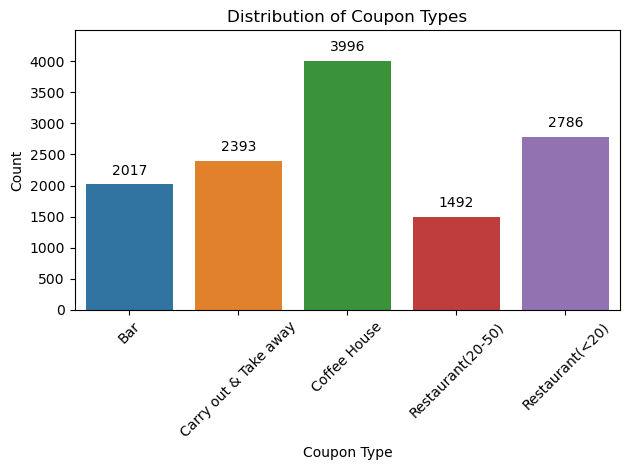

In [227]:
# Count of each coupon type
coupon_counts = data['coupon'].value_counts().sort_index()

# Bar plot
bars = sns.barplot(x=coupon_counts.index, y=coupon_counts.values, hue=coupon_counts.index, legend=False)
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}', 
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),  # 5 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')
plt.ylim(0, max(coupon_counts.values) + 500.0)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/coupon_distribution.png')
plt.show()

6. Use a histogram to visualize the temperature column.

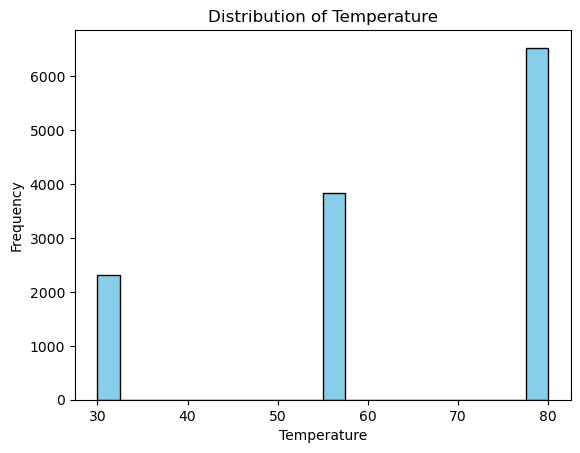

In [195]:
plt.hist(data['temperature'], bins=20, color='skyblue', edgecolor='black')
#sns.histplot(data['temperature'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('images/temp_distribution.png')
plt.show()

Y                             0         1
coupon                                   
Bar                    0.589985  0.410015
Carry out & Take away  0.264522  0.735478
Coffee House           0.500751  0.499249
Restaurant(20-50)      0.558981  0.441019
Restaurant(<20)        0.292893  0.707107


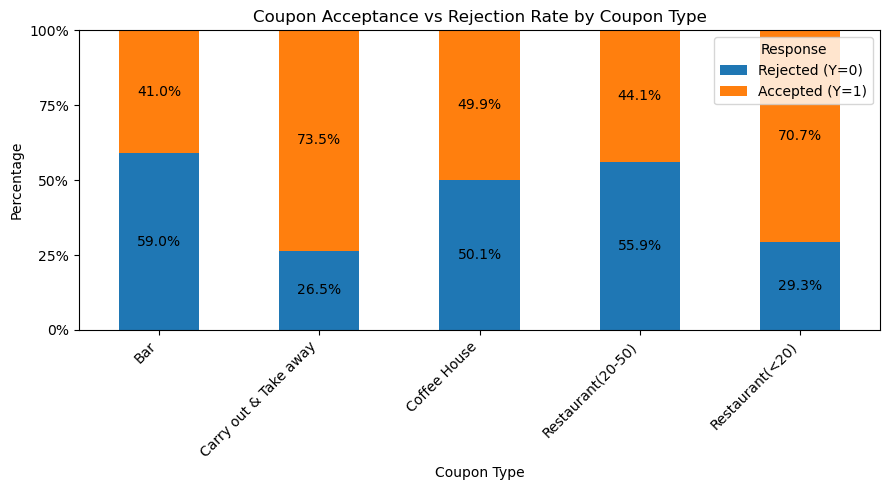

In [171]:
# acceptance rate by coupon types - to understand coupon groups trend and pick another one
# Count accepted and rejected coupons per type
coupon_counts = data.groupby(['coupon', 'Y']).size().unstack(fill_value=0)

coupon_pct = coupon_counts.div(coupon_counts.sum(axis=1), axis=0)
print(coupon_pct)

# Plot stacked bar
fig, ax = plt.subplots(figsize=(9, 5))
coupon_pct[[0, 1]].plot(
    kind='bar',
    stacked=True,
    ax=ax
)

for i, coupon in enumerate(coupon_pct.index):
    rejected_pct = coupon_pct.loc[coupon, 0]
    accepted_pct = coupon_pct.loc[coupon, 1]

    # Rejected label
    ax.text(
        i,
        rejected_pct / 2,
        f"{rejected_pct:.1%}",
        ha='center',
        va='center',
        fontsize=10
    )

    # Accepted label
    ax.text(
        i,
        rejected_pct + accepted_pct / 2,
        f"{accepted_pct:.1%}",
        ha='center',
        va='center',
        fontsize=10
    )

ax.set_title('Coupon Acceptance vs Rejection Rate by Coupon Type')
ax.set_xlabel('Coupon Type')
ax.set_ylabel('Percentage')

ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

plt.xticks(rotation=45, ha='right')
plt.legend(['Rejected (Y=0)', 'Accepted (Y=1)'], title='Response')

plt.tight_layout()
plt.savefig('images/coupon_stacked_percentage.png', dpi=300)
plt.show()


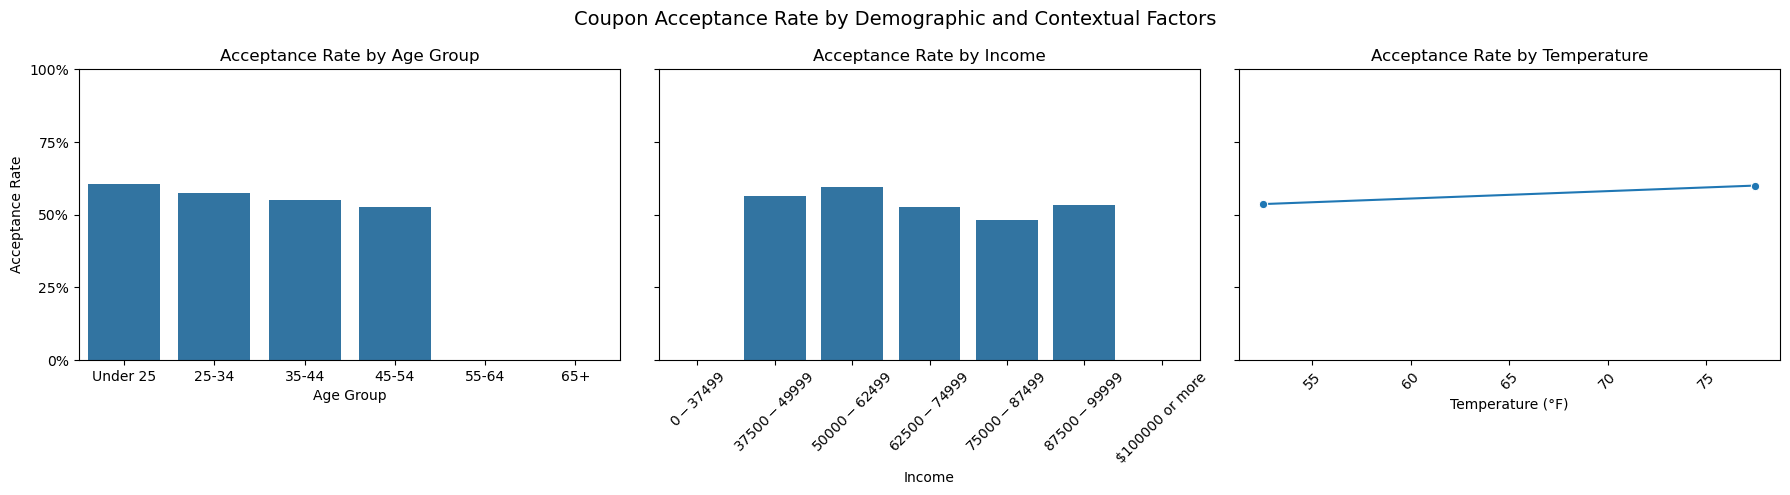

In [194]:
# First convert age to numeric values
data['age_num'] = data['age'].replace({'50plus': 55, 'below21': 20}).astype(float)

# Define age bins and labels
age_bins = [0, 25, 35, 45, 55, 65, 100]  # Example age ranges
age_labels = ['Under 25', '25-34', '35-44', '45-54', '55-64', '65+']  # Example labels

# Now create age_bin using age_num
data['age_bin'] = pd.cut(data['age_num'], bins=age_bins, labels=age_labels)

# Income Preprocessing (ordered categorical) 
income_order = [
    '$0 - $37499', '$37500 - $49999', '$50000 - $62499',
    '$62500 - $74999', '$75000 - $87499',
    '$87500 - $99999', '$100000 or more'
]
data['income'] = pd.Categorical(data['income'], categories=income_order, ordered=True)

# Temperature
temp_bins = np.arange(data['temperature'].min(), data['temperature'].max() + 5, 5)
data['temp_bin'] = pd.cut(data['temperature'], bins=temp_bins)

# acceptance rate
age_accept = (
    data.groupby('age_bin', observed=True)['Y']
    .mean()
    .reset_index()
)

income_accept = (
    data.groupby('income', observed=True)['Y']
    .mean()
    .reset_index()
)

temp_accept = (
    data.groupby('temp_bin', observed=True)['Y']
    .mean()
    .reset_index()
)

temp_accept['temp_mid'] = temp_accept['temp_bin'].apply(
    lambda x: (x.left + x.right) / 2
)


#plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Age
sns.barplot(
    data=age_accept,
    x='age_bin',
    y='Y',
    ax=axes[0]
)
axes[0].set_title('Acceptance Rate by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Acceptance Rate')

# Income
sns.barplot(
    data=income_accept,
    x='income',
    y='Y',
    ax=axes[1]
)
axes[1].set_title('Acceptance Rate by Income')
axes[1].set_xlabel('Income')
axes[1].tick_params(axis='x', rotation=45)

# Temperature
sns.lineplot(
    data=temp_accept,
    x='temp_mid',  # Using temp_mid for better x-axis values
    y='Y',
    marker='o',
    ax=axes[2]
)
axes[2].set_title('Acceptance Rate by Temperature')
axes[2].set_xlabel('Temperature (°F)')
axes[2].tick_params(axis='x', rotation=45)

for ax in axes:
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])

plt.suptitle('Coupon Acceptance Rate by Demographic and Contextual Factors', fontsize=14)
plt.tight_layout()
plt.savefig('images/acceptance_rate_age_income_temp.png', dpi=300)
plt.show()

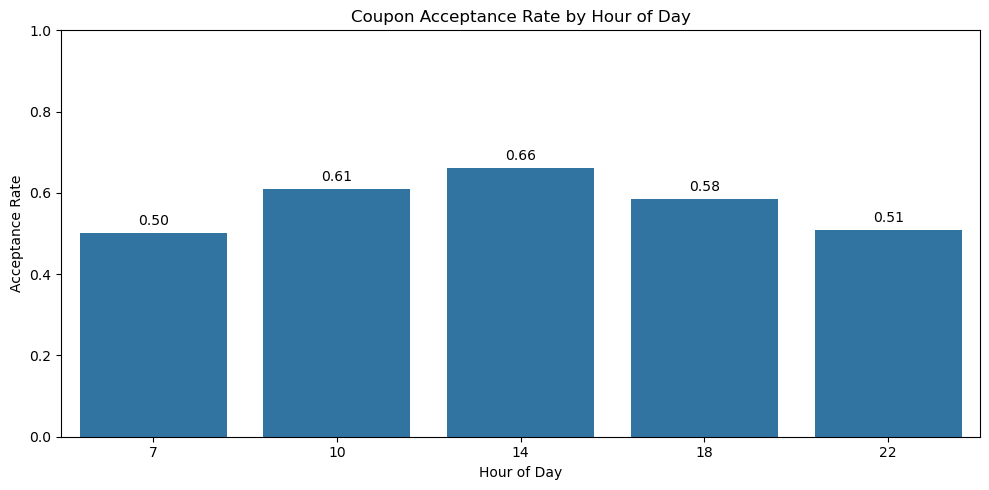

In [160]:
# visualizing time column

def time_to_hour(t):
    if pd.isna(t):
        return None
    t = t.strip().upper()
    if 'AM' in t:
        hour = int(t.replace('AM',''))
        if hour == 12:
            hour = 0
    elif 'PM' in t:
        hour = int(t.replace('PM',''))
        if hour != 12:
            hour += 12
    else:
        return None
    return hour

data['hour'] = data['time'].apply(time_to_hour)

# Compute acceptance rate per hour
acceptance_by_hour = data.groupby('hour')['Y'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=acceptance_by_hour.index, y=acceptance_by_hour.values)
plt.title('Coupon Acceptance Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Acceptance Rate')
plt.ylim(0,1)

# Show values on bars
for i, v in enumerate(acceptance_by_hour.values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.savefig('images/acceptance_rate_by_hour.png', dpi=300)
plt.show()

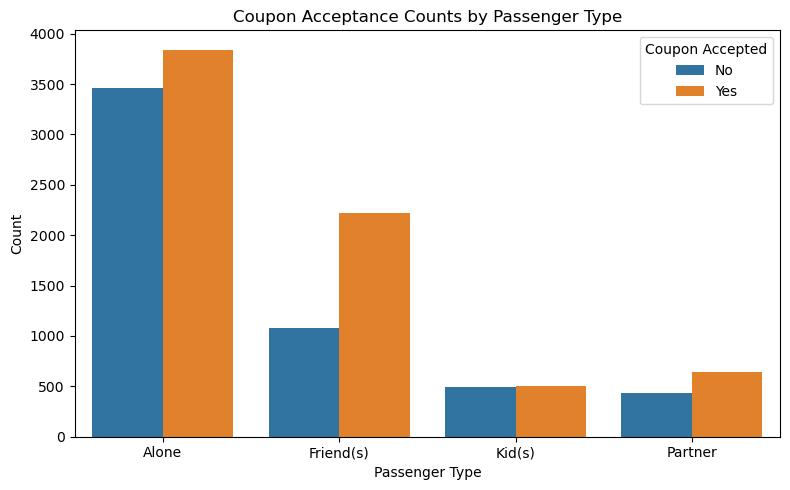

In [158]:
# Create acceptance counts by passenger type
passenger_acceptance = (
    data
    .groupby(['passanger', 'Y'])
    .size()
    .unstack(fill_value=0)
)

# Normalize to get acceptance rates
passenger_acceptance_pct = passenger_acceptance.div(
    passenger_acceptance.sum(axis=1),
    axis=0
)


plt.figure(figsize=(8,5))
sns.countplot(
    data=data,
    x='passanger',
    hue='Y'
)

plt.title('Coupon Acceptance Counts by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])

plt.tight_layout()
plt.savefig('images/acceptance_by_passenger_count.png', dpi=300)
plt.show()


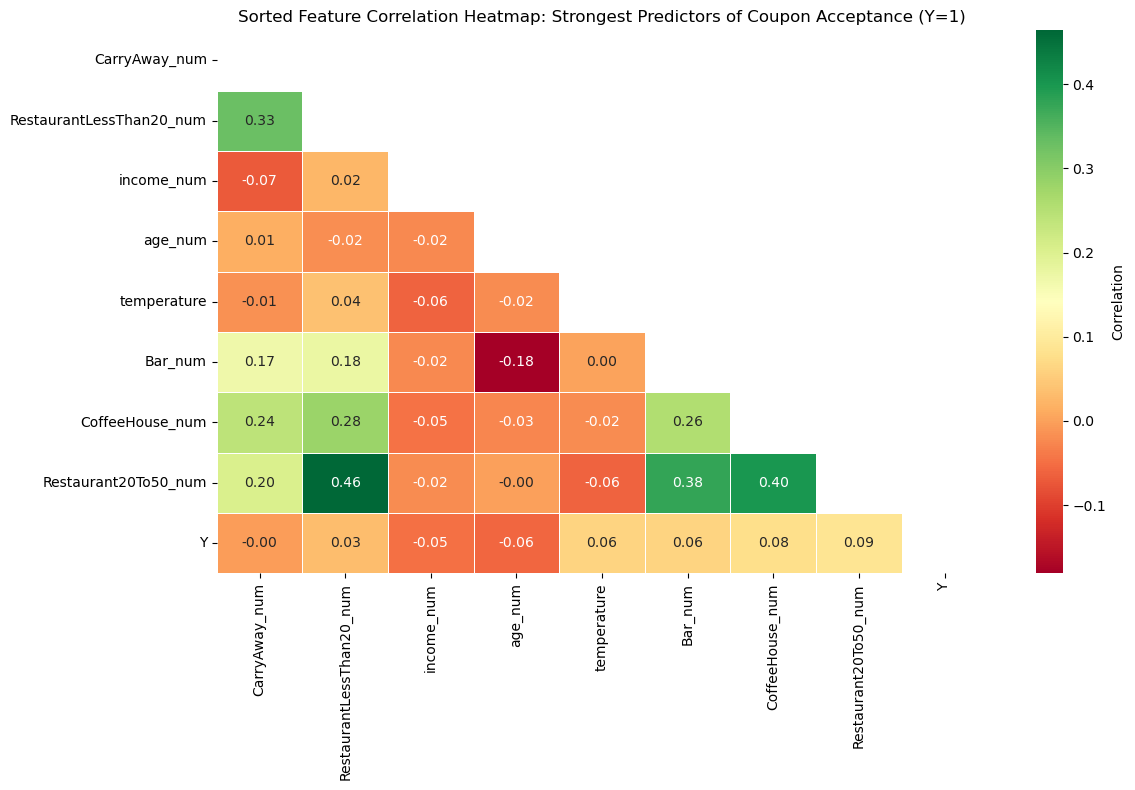

In [159]:
income_map = {
    '$0 - $37499': 0, '$37500 - $49999': 37500, '$50000 - $62499': 50000,
    '$62500 - $74999': 62500, '$75000 - $87499': 75000, '$87500 - $99999': 87500,
    '$100000 or more': 100000
}
data['income_num'] = data['income'].map(income_map)

frequency_map = {
    'never': 0,
    '1~3': 2,
    '4~8': 6,
    'gt8': 10
}

visit_cols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in visit_cols:
    data[col+'_num'] = data[col].map(frequency_map)

numeric_cols = ['age_num', 'income_num', 'temperature'] + [col+'_num' for col in visit_cols] + ['Y']

# Compute correlation matrix
corr_matrix = data[numeric_cols].corr()

# Sort columns and rows by correlation with Y
corr_with_Y = corr_matrix['Y'].abs().sort_values()
sorted_cols = corr_with_Y.index.tolist()
corr_sorted = corr_matrix.loc[sorted_cols, sorted_cols]

# Mask upper triangle for cleaner heatmap
mask = np.triu(np.ones_like(corr_sorted, dtype=bool))

plt.figure(figsize=(12,8))
sns.heatmap(
    corr_sorted,
    annot=True,
    fmt=".2f",
    cmap='RdYlGn',
    mask=mask,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation'}
)
plt.title('Sorted Feature Correlation Heatmap: Strongest Predictors of Coupon Acceptance (Y=1)')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', dpi=300)
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [161]:
bar_data = data[data['coupon']=='Bar'].copy()
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,age_num,age_bin,temp_bin,income_num,Bar_num,CoffeeHouse_num,CarryAway_num,RestaurantLessThan20_num,Restaurant20To50_num,hour
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,21.0,"(20, 30]","(75, 80]",37500.0,0.0,0.0,2.0,6.0,2.0,10
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,21.0,"(20, 30]","(50, 55]",37500.0,0.0,0.0,2.0,6.0,2.0,18
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,21.0,"(20, 30]","(50, 55]",37500.0,0.0,0.0,2.0,6.0,2.0,7
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,21.0,"(20, 30]","(75, 80]",62500.0,0.0,NaN,6.0,6.0,NaN,10
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,21.0,"(20, 30]","(50, 55]",62500.0,0.0,NaN,6.0,6.0,NaN,18


2. What proportion of bar coupons were accepted?


In [162]:
bar_acceptance_rate = bar_data['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2f}")

Proportion of bar coupons accepted: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


  Bar_Group_byFreq         Y
0              <=3  0.337340
1               >3  0.527958


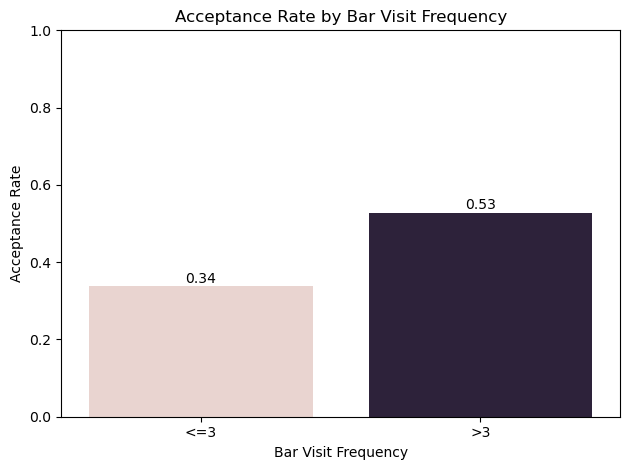

In [163]:
# Bar, Cheap restaurants, etc columns are categorical (e.g., "never", "1~3", "4~8", "gt8") and not numeric
# so we first need to map them to approximate numbers. We will use below frequency map to do the same as needed

bar_data['Bar_numFreq'] = bar_data['Bar'].map(frequency_map)
bar_data['Bar_Group_byFreq'] = np.where(bar_data['Bar_numFreq'] <= 3, '<=3', '>3')
acceptance_by_group = bar_data.groupby('Bar_Group_byFreq')['Y'].mean().reset_index()
print(acceptance_by_group)

# Plot acceptance rates
sns.barplot(x='Bar_Group_byFreq', y='Y', data=acceptance_by_group, hue='Y', legend=False)
plt.title('Acceptance Rate by Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0,1)
for index, row in acceptance_by_group.iterrows():
    plt.text(index, row['Y'] + 0.01, f"{row['Y']:.2f}", ha='center')
plt.xlabel('Bar Visit Frequency')
plt.tight_layout()
plt.savefig('images/acceptance_by_bar_freq.png', dpi=300)
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


  FrequentBarAgeOver25         Y
0   FrequentBar_Over25  0.695238
1               Others  0.335003


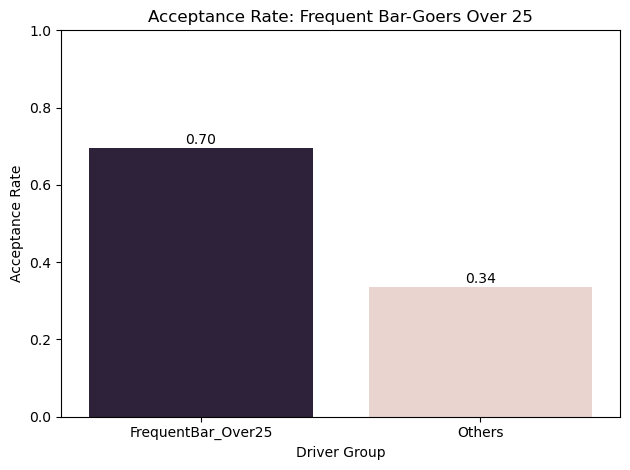

In [164]:
bar_data['FrequentBarAgeOver25'] = np.where((bar_data['Bar_numFreq'] > 1) & (bar_data['age_num'] > 25),
                                  'FrequentBar_Over25', 'Others')
acceptance_by_group = bar_data.groupby('FrequentBarAgeOver25')['Y'].mean().reset_index()
print(acceptance_by_group)

# Plot acceptance rates
sns.barplot(x='FrequentBarAgeOver25', y='Y', data=acceptance_by_group, hue='Y', legend=False)
plt.title('Acceptance Rate: Frequent Bar-Goers Over 25')
plt.ylabel('Acceptance Rate')
plt.ylim(0,1)
for index, row in acceptance_by_group.iterrows():
    plt.text(index, row['Y'] + 0.01, f"{row['Y']:.2f}", ha='center')
plt.xlabel('Driver Group')
plt.tight_layout()
plt.savefig('images/acceptance_by_age_over25.png', dpi=300)
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


     MultipleBarNoKidsNonAgri         Y
0  MultipleBar_NonKid_NonAgri  0.687919
1                      Others  0.293455


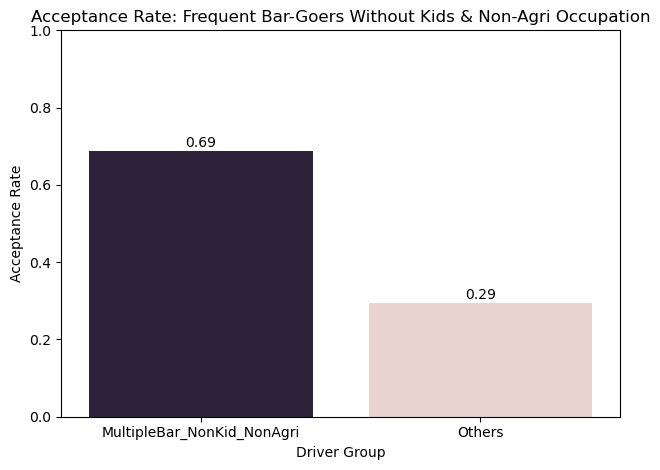

In [165]:
bar_data['MultipleBarNoKidsNonAgri'] = np.where(
    (bar_data['Bar_numFreq'] > 1) &
    (bar_data['passanger'] != 'Kid') &
    (~bar_data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])),
    'MultipleBar_NonKid_NonAgri',
    'Others'
)

acceptance_rates = bar_data.groupby('MultipleBarNoKidsNonAgri')['Y'].mean().reset_index()
print(acceptance_rates)

# Plot
sns.barplot(x='MultipleBarNoKidsNonAgri', y='Y', data=acceptance_rates, hue='Y', legend=False)
plt.title('Acceptance Rate: Frequent Bar-Goers Without Kids & Non-Agri Occupation')
plt.ylabel('Acceptance Rate')
plt.ylim(0,1)
plt.xlabel('Driver Group')

# Add values on bars
for index, row in acceptance_rates.iterrows():
    plt.text(index, row['Y'] + 0.01, f"{row['Y']:.2f}", ha='center')

plt.tight_layout()
plt.savefig('images/acceptance_multiplebar_nokid_nonagri.png', dpi=300)
plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



   FrequentBar_NoKids_NoWidowed         Y
0  FrequentBar_NoKids_NoWidowed  0.774869
1                        Others  0.371851
  FrequentBarAgeUnder30         Y
0   FrequentBar_Under30  0.721739
1                Others  0.345694
    FrequentCheapRestLowIncome         Y
0  FrequentCheapRest_LowIncome  0.701389
1                       Others  0.707419


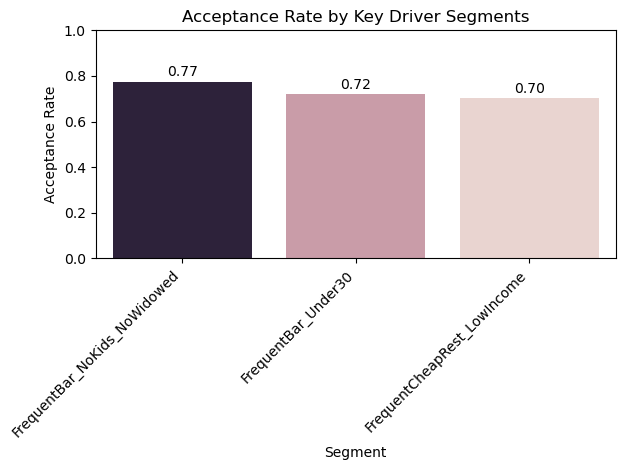

In [166]:
# group1: no kids, not widowed
bar_data['FrequentBar_NoKids_NoWidowed'] = np.where(
    (bar_data['Bar_numFreq'] > 3) &
    (bar_data['passanger'] != 'Kid(s)') &
    (bar_data['maritalStatus'] != 'Widowed'),
    'FrequentBar_NoKids_NoWidowed',
    'Others'
)
acceptance_group1 = bar_data.groupby('FrequentBar_NoKids_NoWidowed')['Y'].mean().reset_index()
print(acceptance_group1)
acceptance_group1 = acceptance_group1.rename(columns={'Y':'AcceptanceRate'})


# group2: Younger Drivers (under 30) going to bar
# Map special age strings to numbers
age_map = {
    'below21': 20,
    '50plus': 55
}

# Convert age column to numeric
bar_data['age_num'] = pd.to_numeric(bar_data['age'], errors='coerce')  # convert numeric strings
bar_data['age_num'] = bar_data['age_num'].fillna(bar_data['age'].map(age_map))  # map special strings

# safely create segment
bar_data['FrequentBarAgeUnder30'] = np.where(
    (bar_data['Bar_numFreq'] > 1) & (bar_data['age_num'] < 30),
    'FrequentBar_Under30',
    'Others'
)

# Check acceptance rate
acceptance_group2 = bar_data.groupby('FrequentBarAgeUnder30')['Y'].mean().reset_index()
print(acceptance_group2)
acceptance_group2.rename(columns={'Y':'AcceptanceRate'}, inplace=True)



#group3: cheap restaurants > 4 with income < 50K
# here we will need income which is again categorical so we map it with number using below map
income_map = {
    '$0 - $37499': 0,
    '$37500 - $49999': 37500,
    '$50000 - $62499': 50000,
    '$62500 - $74999': 62500,
    '$75000 - $87499': 75000,
    '$87500 - $99999': 87500,
    '$100000 or more': 100000
}
cheap_rest_data = data[data['coupon']=='Restaurant(<20)'].copy()
cheap_rest_data['CheapRest_numFreq'] = cheap_rest_data['RestaurantLessThan20'].map(frequency_map)
cheap_rest_data['CheapRest_incomeGrp'] = cheap_rest_data['income'].map(income_map)
cheap_rest_data['FrequentCheapRestLowIncome'] = np.where(
    (cheap_rest_data['CheapRest_numFreq'] > 4) &
    (cheap_rest_data['CheapRest_incomeGrp'] < 50000),
    'FrequentCheapRest_LowIncome',
    'Others'
)
acceptance_group3 = cheap_rest_data.groupby('FrequentCheapRestLowIncome')['Y'].mean().reset_index()
print(acceptance_group3)
acceptance_group3.rename(columns={'Y':'AcceptanceRate'}, inplace=True)

# Combine all segments for plotting
df_plot = pd.DataFrame({
    'Segment': [
        'FrequentBar_NoKids_NoWidowed', 'FrequentBar_Under30', 'FrequentCheapRest_LowIncome'
    ],
    'AcceptanceRate': [
        acceptance_group1.loc[acceptance_group1['FrequentBar_NoKids_NoWidowed']=='FrequentBar_NoKids_NoWidowed','AcceptanceRate'].values[0],
        acceptance_group2.loc[acceptance_group2['FrequentBarAgeUnder30']=='FrequentBar_Under30','AcceptanceRate'].values[0],
        acceptance_group3.loc[acceptance_group3['FrequentCheapRestLowIncome']=='FrequentCheapRest_LowIncome','AcceptanceRate'].values[0]
    ]
})

# Plot
sns.barplot(x='Segment', y='AcceptanceRate', data=df_plot, hue='AcceptanceRate', legend=False)

# Add values on top of bars
for idx, row in df_plot.iterrows():
    plt.text(idx, row['AcceptanceRate'] + 0.01, f"{row['AcceptanceRate']:.2f}", ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Acceptance Rate')
plt.ylim(0,1)
plt.title('Acceptance Rate by Key Driver Segments')
plt.tight_layout()
plt.savefig('images/acceptance_rate_segments.png', dpi=300)
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [196]:
print("""
Drivers who frequently visit bars, are not accompanied by children, and are not widowed have the highest likelihood of accepting bar coupons (~77%).
Younger drivers (under 30) who frequently go to bars also show a high acceptance rate (~73%).
Drivers who are occasional bar-goers, accompanied by children, or widowed are less likely to accept bar coupons (~35-37%).
Conclusion: Frequency of bar visits, passenger type, age, and marital status are strong predictors of bar coupon acceptance.
""")


Drivers who frequently visit bars, are not accompanied by children, and are not widowed have the highest likelihood of accepting bar coupons (~77%).
Younger drivers (under 30) who frequently go to bars also show a high acceptance rate (~73%).
Drivers who are occasional bar-goers, accompanied by children, or widowed are less likely to accept bar coupons (~35-37%).
Conclusion: Frequency of bar visits, passenger type, age, and marital status are strong predictors of bar coupon acceptance.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  


Acceptance rate for FrequentCarry_NoKids:
 FrequentCarry_NoKids
FrequentCarry_NoKids    0.753321
Others                  0.721434
Name: Y, dtype: float64

Acceptance rate for FrequentCarry_Under30:
 FrequentCarry_NoKids
FrequentCarry_NoKids    0.753321
Others                  0.721434
Name: Y, dtype: float64

Acceptance rate for FrequentCarry_LowIncome:
 FrequentCarry_NoKids
FrequentCarry_NoKids    0.753321
Others                  0.721434
Name: Y, dtype: float64

Acceptance rate for Carry_NoKids_Under30:
 FrequentCarry_NoKids
FrequentCarry_NoKids    0.753321
Others                  0.721434
Name: Y, dtype: float64


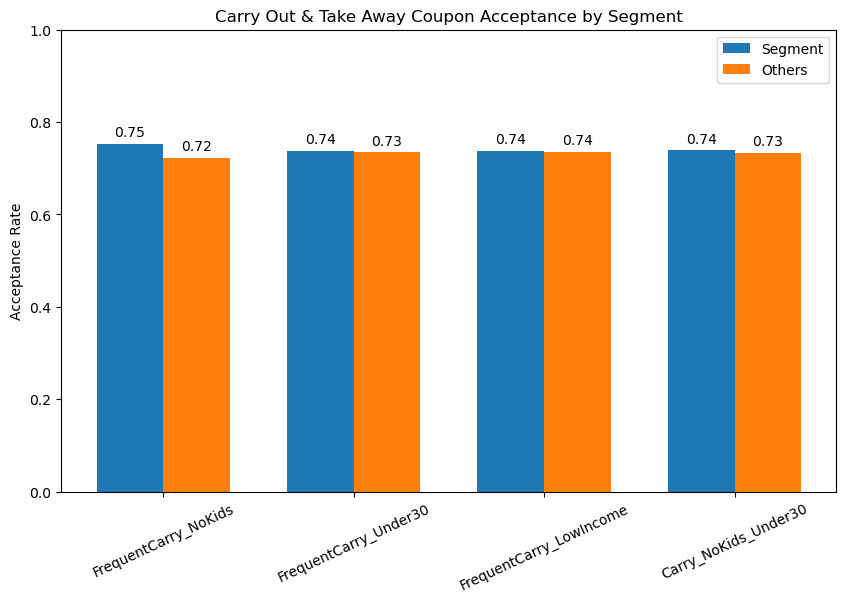

In [220]:
# From above graph, "carry out & take away" looks intersting, let's analyze that
carry_data = data[data['coupon'] == 'Carry out & Take away'].copy()
carry_data['Carry_numFreq'] = carry_data['CarryAway'].map(frequency_map)
carry_data['age'] = pd.to_numeric(carry_data['age'], errors='coerce')

# Frequent visitors with no kids
carry_data['FrequentCarry_NoKids'] = np.where(
    (carry_data['Carry_numFreq'] > 3) & 
    (carry_data['passanger'] != 'Kid(s)'),
    'FrequentCarry_NoKids',
    'Others'
)

# Younger drivers (<30) who go frequently
carry_data['FrequentCarry_Under30'] = np.where(
    (carry_data['Carry_numFreq'] > 1) & 
    (carry_data['age'] < 30),
    'FrequentCarry_Under30',
    'Others'
)

# Low income frequent visitors
carry_data['income_num'] = carry_data['income'].map(income_map)

carry_data['FrequentCarry_LowIncome'] = np.where(
    (carry_data['Carry_numFreq'] > 4) & (carry_data['income_num'] < 50000),
    'FrequentCarry_LowIncome',
    'Others'
)

# Passengers not kids & under 30
carry_data['Carry_NoKids_Under30'] = np.where(
    (carry_data['passanger'] != 'Kid(s)') & (carry_data['age'] < 30),
    'Carry_NoKids_Under30',
    'Others'
)

# acceptance rates
segments = ['FrequentCarry_NoKids', 'FrequentCarry_Under30', 'FrequentCarry_LowIncome', 'Carry_NoKids_Under30']

# Compute acceptance rates dynamically
acceptance_rates = []
others_rates = []
for seg in segments:
    grouped = carry_data.groupby(seg)['Y'].mean()
    print(f"\nAcceptance rate for {seg}:\n", acceptance)
    acceptance_rates.append(grouped.get(seg, 0))
    others_label = [x for x in grouped.index if x != seg]
    others_rate = grouped[others_label[0]] if others_label else 0
    others_rates.append(others_rate)

index = np.arange(len(segments))
bar_width = 0.35

# bar
plt.figure(figsize=(10,6))
bars1 = plt.bar(index, acceptance_rates, bar_width, label='Segment')
bars2 = plt.bar(index + bar_width, others_rates, bar_width, label='Others')
# Add values on top of the bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.xticks([i + bar_width/2 for i in index], segments, rotation=25)
plt.ylabel('Acceptance Rate')
plt.title('Carry Out & Take Away Coupon Acceptance by Segment')
plt.ylim(0, 1)
plt.legend()
plt.savefig('images/carryout_analysis_combined.png', dpi=300)
plt.show()